In [1]:
from selenium import webdriver
import time
import matplotlib.pyplot as plt
import numpy as np
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
driver = webdriver.Chrome(executable_path='/Users/hardikdudeja/Downloads/chromedriver')

In [2]:
def login(username, password):
    driver.get('https://www.instagram.com/')
    # waiting till the element appears
    btn_login = WebDriverWait(driver, 10).until( 
            EC.presence_of_element_located((By.XPATH, '/html/body//article/div[2]/div/div/form/div/div[3]')) 
        )
    nameField = driver.find_element_by_name('username')
    passwordField = driver.find_element_by_name('password')
    nameField.send_keys(username)
    passwordField.send_keys(password)     
    btn_login.click()


In [3]:
def loginProcess():
    try:
        btn_notNow = driver.find_element_by_xpath('//button[contains(@class, "yWX7d")]')
        btn_notNow.click()
    except:
        pass
    time.sleep(3)
    try:
        btn_no = driver.find_element_by_xpath('//button[contains(@class, "HoLwm")]')
        btn_no.click()
    except:
        pass

In [5]:
#Login process
login('dudejaahardik', '21@Hardik39')
time.sleep(3)
loginProcess()

In [4]:
def search(string):
    searchBox = driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]')
    searchBox.clear()
    searchBox.send_keys(string)
    #using explicit wait
    results = WebDriverWait(driver, 10).until( 
                EC.presence_of_all_elements_located((By.XPATH, '//div[contains(@class, "fuqBx")]//a')) 
            )
    li_names = []
    for ele in results:
        ele = ele.get_attribute('href')
        ele = ele.split('/')
        if(len(ele) == 5):
            if(ele[-2] == 'food'):
                continue
            li_names.append(ele[-2])
    return li_names


In [6]:
# these are the top 10 profiles result
li_profiles = search('food')
li_profiles = li_profiles[:10]
for ele in li_profiles:
    print(ele)

yourfoodlab
sailusfood
dilsefoodie
foodys
delhifoodwalks
foodie_incarnate
foodbeast
tasty.foodrecipes
foodnetwork
gurgaonfoodblog


In [7]:
#this function opens the profile with the given username
def searchAndOpenProfile(string):
    searchBox = driver.find_element_by_xpath('//input[contains(@class, "XTCLo")]')
    searchBox.clear()
    searchBox.send_keys(string)
    time.sleep(1)
    result = WebDriverWait(driver, 10).until( 
                EC.presence_of_element_located((By.XPATH, '//div[contains(@class, "fuqBx")]/div/a')) 
            )
    result.click()
    

In [8]:
#works only if a profile is opened
def getNumFollowers():
    try:
        followerText = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.XPATH, '//span[contains(@class, "g47SY")]'))
            )
        followers = followerText[1].get_attribute('title')
        return followers
    except:
        pass

In [9]:
#only when profile is open
def openFirstPost():
    try:
        firstPost = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, 'eLAPa'))
            )
        firstPost.click()
    except:
        pass

In [10]:
def nextPost():
    btn_next = driver.find_element_by_xpath('//div[contains(@class, "DdSX2")]/a[last()]')
    btn_next.click()
    time.sleep(1)

In [11]:
def getProfileWithTopFollowers(li_profiles):
    dict_followers = {}
    for ele in li_profiles:
        searchAndOpenProfile(ele)
        time.sleep(2)
        numFollowers = getNumFollowers()
        numFollowers = numFollowers.replace(',', '')
        dict_followers[ele] = int(numFollowers)
        time.sleep(1)
    li_ans = [(k,v) for k, v in sorted(dict_followers.items(), key=lambda item: item[1])]
    li_ans = li_ans[::-1]
    li_ans = li_ans[0:5]
    return li_ans
    

In [12]:
li_topFollowers = getProfileWithTopFollowers(li_profiles)
for ele in li_topFollowers:
    print(ele)

('foodnetwork', 11166520)
('foodys', 8761956)
('yourfoodlab', 1617711)
('foodbeast', 1439801)
('dilsefoodie', 747591)


In [13]:
# this works only when a post is opened
def getDateOfPost():
    # wait how much it is required
    date = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//time[contains(@class, "_1o9PC Nzb55")]'))
    )
    date = date.get_attribute('datetime')
    date = date.split('T')
    date = date[0]
    date = date.split('-')
    date = int(date[-1])
    return date
    

In [14]:
from datetime import date
def getNumPosts(li):
    today = str(date.today())
    today = today.split('-')
    today = int(today[-1])
    
    nameCount = []
    
    for ele in li:
        count = 0
        
        # page has been opened
        searchAndOpenProfile(ele[0])
        time.sleep(1)
        openFirstPost()
        dateOfPost = getDateOfPost()
        while today - dateOfPost <= 3:
            count = count + 1
            nextPost()
            dateOfPost = getDateOfPost()
        btnClose = driver.find_elements_by_xpath('//button[contains(@class, "wpO6b")]')[-1]
        btnClose.click()
        nameCount.append((ele[0], count))
        time.sleep(2)
    return nameCount

In [15]:
nameCount = getNumPosts(li_topFollowers)
for ele in nameCount:
    print(ele)

('foodnetwork', 27)
('foodys', 7)
('yourfoodlab', 3)
('foodbeast', 8)
('dilsefoodie', 2)


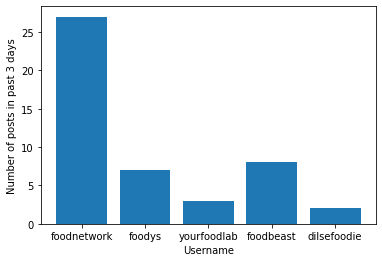

In [17]:
# making bar graph
li_names = [ele[0] for ele in nameCount]
li_count = [ele[1] for ele in nameCount]
plt.bar(li_names, li_count)
plt.xlabel('Username')
plt.ylabel('Number of posts in past 3 days')
plt.show()

In [18]:
def getHashTags(li_usernames):
    d_words = {}
    for ele in li_usernames:
        searchAndOpenProfile(ele[0])
        time.sleep(2)
        openFirstPost()

        #find hashtags
        i = 0
        while i < 10:
            try:
                li_allTags = WebDriverWait(driver, 5).until(
                    EC.presence_of_all_elements_located((By.XPATH, '//a[contains(@class, " xil3i")]'))
                    )
                for ele in li_allTags:
                    text = ele.text
                    d_words[text] = d_words.get(text,0) + 1
            except:
                pass
            nextPost()
            i = i+1
        btnExit = driver.find_elements_by_xpath('//button[contains(@class, "wpO6b")]')[-1]
        btnExit.click()
    return d_words
    

In [19]:
d_words = getHashTags(li_topFollowers)
d_words

{'#discoveryplus': 3,
 '#Chopped': 1,
 '#EasterBasketChallenge': 3,
 '#GuysRanchKitchen': 1,
 '#TheKitchen': 1,
 '#SpringBakingChampionship': 1,
 '#BarefootContessa': 1,
 '#beautifulmistake': 2,
 '#music': 2,
 '#DigSwirlSpread': 1,
 '#EpigamiaGheeSpread': 1,
 '#thandai': 2,
 '#thandairecipe': 2,
 '#holifestival': 2,
 '#holi': 2,
 '#holicelebration': 2,
 '#chocolate': 2,
 '#mango': 2,
 '#mangoseason': 2,
 '#summerseason': 2,
 '#sanjyotkeer': 6,
 '#yourfoodlab': 6,
 '#foodporn': 4,
 '#recipeoftheday': 5,
 '#recipevideo': 4,
 '#gheeroast': 2,
 '#foodphotography': 4,
 '#foodstagram': 4,
 '#streetfood': 2,
 '#foodlover': 2,
 '#foodpics': 2,
 '#streetfoodlover': 2,
 '#indiancuisine': 2,
 '#foodstylist': 2,
 '#foodiesofinstagram': 2,
 '#egg': 2,
 '#eggcurry': 2,
 '#eggs': 2,
 '#egglover': 2,
 '#goanrecipes': 2,
 '#goanfood': 2,
 '#recipe': 2,
 '#burger': 2,
 '#burgerlove': 2,
 '#burgertime': 2,
 '#burgerlover': 2,
 '#vegburger': 2,
 '#vegrecipesofindia': 2,
 '#vegetarian': 2,
 '#rajma': 2,
 '

In [24]:
#Create dataframe
import pandas as pd
df = pd.DataFrame(d_words.items(), columns=['Words', 'Frequency'])
df.sort_values(by=['Frequency'], ascending = False, inplace = True)
df.reset_index(inplace=True, drop = True)
df

,Words,Frequency
0,#foodbeast,10
1,#dilsefoodie,9
2,#sanjyotkeer,6
3,#yourfoodlab,6
4,#recipeoftheday,5
...,...,...
72,#BarefootContessa,1
73,#DigSwirlSpread,1
74,#EpigamiaGheeSpread,1
75,#Chopped,1


In [25]:
#Create csv
df.to_csv('words.csv', index = False)

In [27]:
for i in range(10):
    print(df.iloc[i]['Words'], ":", df.iloc[i]['Frequency'])

#foodbeast : 10
#dilsefoodie : 9
#sanjyotkeer : 6
#yourfoodlab : 6
#recipeoftheday : 5
#foodstagram : 4
#foodphotography : 4
#foodporn : 4
#recipevideo : 4
#discoveryplus : 3


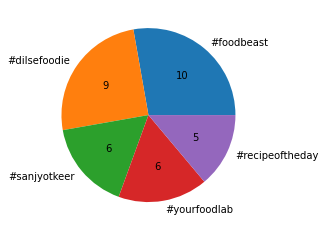

In [28]:
li_words = df['Words'][0:5]
li_frequency = df['Frequency'][0:5]
li_frequency = np.array(li_frequency)

def absolute_value(val):
    a  = np.round(val/100*li_frequency.sum())
    return int(a)

plt.pie(li_frequency, labels=li_words, autopct=absolute_value)
plt.show()

In [29]:
def getAvgLikes(li_usernames):
    li_ans = []
    for ele in li_usernames:
        li_likes = []
        print(ele[0])
        searchAndOpenProfile(ele[0])
        time.sleep(1)
        openFirstPost()
        time.sleep(1)
        i=0
        while i < 10:
            try:
                likes = WebDriverWait(driver, 5).until(
                    EC.presence_of_element_located((By.CLASS_NAME, 'vcOH2'))
                )
                likes.click()
                numLikes = WebDriverWait(driver, 5).until(
                    EC.presence_of_element_located((By.CLASS_NAME, 'vJRqr'))
                )
                likes = numLikes.text
                print(likes)
#                 likes = likes.split()[0]
#                 likes = int(likes)
                li_likes.append(likes)
                driver.find_element_by_class_name('QhbhU').click()
            except:
                pass
            try:
                likes = WebDriverWait(driver,5).until(
                    EC.presence_of_element_located((By.CLASS_NAME, 'zV_Nj'))
                )
                likes = likes.text
                print(likes)
#                 likes = likes.split()[0]
#                 likes = int(likes)

                li_likes.append(likes)
                
            except:
                pass
            nextPost()
            i += 1
        li_ans.append([ele[0], li_likes])
        print()
        btnExit = driver.find_elements_by_xpath('//button[contains(@class, "wpO6b")]')[-1]
        btnExit.click()
    return li_ans

In [30]:
li_ans = getAvgLikes(li_topFollowers)

foodnetwork
2,676 likes
41,770 likes
6,290 likes
3,622 likes
6,677 likes
2,027 likes
20,176 likes
13,821 likes
4,241 likes
48,801 likes

foodys
1,308 likes
30,347 likes
25,645 likes
38,254 likes
13,377 likes
29,514 likes
50,663 likes
21,849 likes
25,838 likes
18,212 likes

yourfoodlab
14,870 likes
19,018 likes
39,085 likes
30,188 likes
27,525 likes
20,161 likes
20,890 likes
18,215 likes
146,788 likes
32,583 likes

foodbeast
5,804 likes
17,407 likes
9,951 likes
12,340 likes
12,290 likes
7,592 likes
4,782 likes
6,750 likes
7,913 likes
14,752 likes

dilsefoodie
2,447 likes
2,033 likes
3,301 likes
3,760 likes
14,813 likes
16,541 likes
18,435 likes
19,630 likes
16,329 likes
13,445 likes



In [37]:
li_numLikes = []
for ele in li_ans:
    add = 0
    for num in ele[1]:
        num = num.split()
        num = num[0].replace(',','')
        num = int(num)
        add += num
    small_ele = [ele[0], add/len(ele[1])]
    li_numLikes.append(small_ele)
print(li_numLikes)
        
    

[['foodnetwork', 15010.1], ['foodys', 25500.7], ['yourfoodlab', 36932.3], ['foodbeast', 9958.1], ['dilsefoodie', 11073.4]]


In [38]:
import numpy as np
li_name = []
li_followers = []
li_likes = []
for i in range(len(li_topFollowers)):
    li_name.append(li_topFollowers[i][0])
    li_followers.append(li_topFollowers[i][1])
    li_likes.append(li_numLikes[i][1])
    
li_followers = np.array(li_followers)
li_likes = np.array(li_likes)
li_ratio = li_followers/li_likes
print(li_names)
print(li_followers)
print(li_likes)
print(li_ratio)


['foodnetwork', 'foodys', 'yourfoodlab', 'foodbeast', 'dilsefoodie']
[11166520  8761956  1617711  1439801   747591]
[15010.1 25500.7 36932.3  9958.1 11073.4]
[743.93375127 343.59668558  43.80206486 144.58591498  67.51232684]


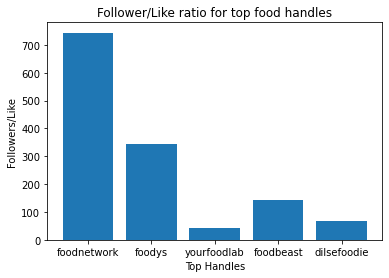

In [39]:
plt.bar(li_name, li_ratio)
plt.title("Follower/Like ratio for top food handles")
plt.xlabel("Top Handles")
plt.ylabel("Followers/Like")
plt.show()